# Load Neccessary python Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# Load Dataset 
df = pd.read_csv('C:\\Users\\Specter\\Documents\\raw_analyst_ratings.csv\\raw_analyst_ratings.csv')
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [10]:
df = df.drop(columns=["Unnamed: 0"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


# Descriptive Statistics 
 # Obtaining basic statistics for textual lengths.

In [19]:
# Calculate headline length
df['headline_length'] = df['headline'].str.len()
df['headline_length']

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline_length, Length: 1407328, dtype: int64

In [16]:
# Descriptive statistics for headline length
headline_stats = df['headline_length'].describe().T
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

Descriptive Statistics for Headline Length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [20]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers and their Article Counts:")
print(publisher_counts)


Top Publishers and their Article Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [ ]:
# Analyze Publication Dates

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group articles by publication date
daily_articles = df.groupby(df['date'].dt.date).size()

print(f"\nNumber of Articles Published by Date: {daily_articles}")


Number of Articles Published by Date: date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


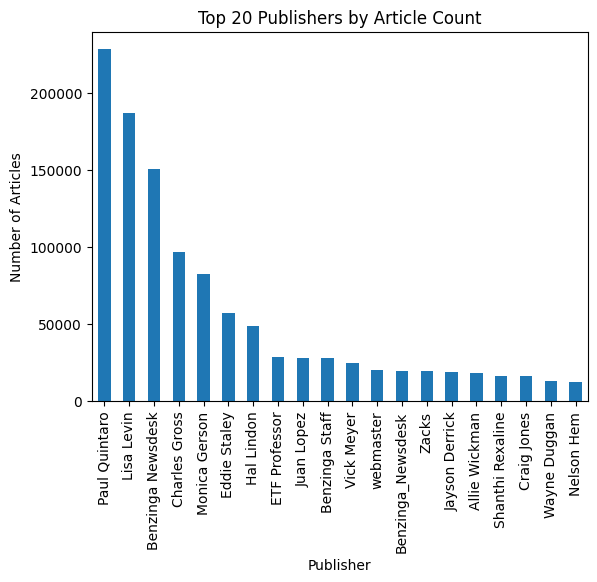

In [27]:
# Plot articles by publisher
publisher_counts.head(20).plot(kind='bar', title='Top 20 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

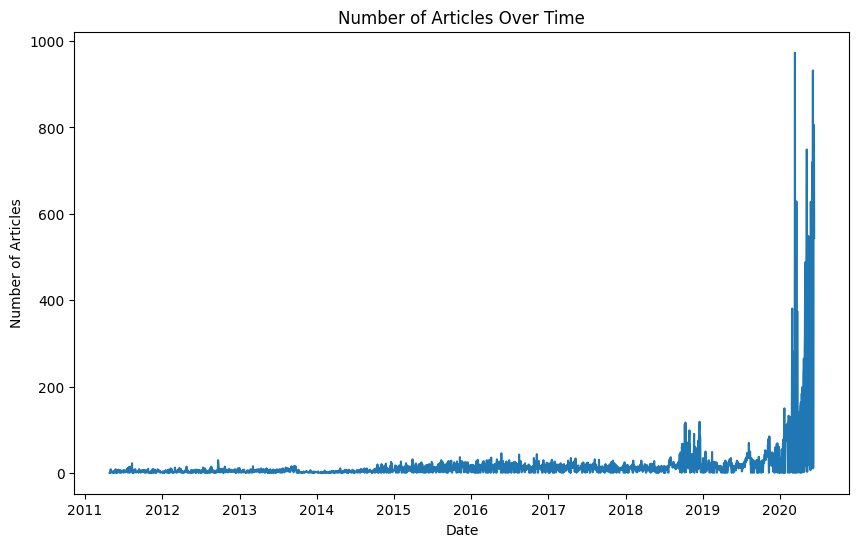

In [28]:
# Plot articles by publication date
daily_articles.plot(kind='line', title='Number of Articles Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()